We will use CIFAR-10 dataset to build a CNN image classifier. CIFAR-10 dataset has 10 different labels
*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship
*   Truck

It has 50,000 training data and 10,000 testing image data. Image size in CIFAR-10 is 32 x 32 x 3. It comes with Keras library.

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

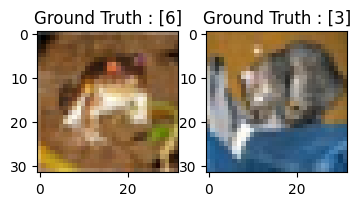

In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [5]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [6]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

In [14]:
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [16]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
196/196 [==============================] - 7s 26ms/step - loss: 2.0684 - accuracy: 0.2313 - val_loss: 1.8329 - val_accuracy: 0.3365
Epoch 2/100
196/196 [==============================] - 4s 23ms/step - loss: 1.7249 - accuracy: 0.3694 - val_loss: 1.5120 - val_accuracy: 0.4460
Epoch 3/100
196/196 [==============================] - 5s 23ms/step - loss: 1.5516 - accuracy: 0.4382 - val_loss: 1.4861 - val_accuracy: 0.4693
Epoch 4/100
196/196 [==============================] - 5s 23ms/step - loss: 1.4301 - accuracy: 0.4851 - val_loss: 1.2895 - val_accuracy: 0.5319
Epoch 5/100
196/196 [==============================] - 4s 23ms/step - loss: 1.3320 - accuracy: 0.5222 - val_loss: 1.1734 - val_accuracy: 0.5775
Epoch 6/100
196/196 [==============================] - 5s 23ms/step - loss: 1.2385 - accuracy: 0.5603 - val_loss: 1.2683 - val_accuracy: 0.5456
Epoch 7/100
196/196 [==============================] - 4s 23ms/step - loss: 1.1641 - accuracy: 0.5880 - val_loss: 1.1045 - val_accuracy:

[0.7780959606170654, 0.7871000170707703]